## Case Study - Churn Prediction

A ride-sharing company (Company X) is interested in predicting rider retention.
To help explore this question, we have provided a sample dataset of a cohort of 
users who signed up for an account in January 2014. The data was pulled on July 1, 2014; 
we consider a user retained if they were “active” (i.e. took a trip) in 
the preceding 30 days (from the day the data was pulled). In other words, a user is "active"
if they have taken a trip since June 1, 2014. The data, `churn.csv`, is in the 
[data](data) folder.  The data are split into train and test sets.  You are encouraged
to tune and estimate your model's performance on the train set, then see how it does on
the unseen data in the test set at the end.

We would like you to use this data set to help understand **what factors are the best
predictors for retention**, and offer suggestions to operationalize those insights to 
help Company X. Therefore, your task is not only to build a model that minimizes error,
but also a model that allows you to interpret the factors that contributed to your predictions.

Here is a detailed description of the data:

```
city: city this user signed up in
phone: primary device for this user
signup_date: date of account registration; in the form `YYYYMMDD`
last_trip_date: the last time this user completed a trip; in the form `YYYYMMDD`
avg_dist: the average distance (in miles) per trip taken in the first 30 days after signup
avg_rating_by_driver: the rider’s average rating over all of their trips
avg_rating_of_driver: the rider’s average rating of their drivers over all of their trips 
surge_pct: the percent of trips taken with surge multiplier > 1
avg_surge: The average surge multiplier over all of this user’s trips 
trips_in_first_30_days: the number of trips this user took in the first 30 days after signing up
luxury_car_user: TRUE if the user took a luxury car in their first 30 days; FALSE otherwise
weekday_pct: the percent of the user’s trips occurring during a weekday
```

## Work Flow

1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided
   data for this analysis.
   
2. Build a predictive model to help determine whether or not a user will be retained.

3. Evaluate the model.
 
4. Identify / interpret features that are the most influential in affecting your predictions.

5. Discuss the validity of your model. Issues such as [leakage.](https://www.kaggle.com/wiki/Leakage)

6. Repeat 2 - 5 until you have a satisfactory model.
   
## Deliverables

- Code you used to build the model.

- A presentation including the following points:
    - How did you compute the target?
    - What model did you use in the end? Why?
    - Alternative models you considered? Why are they not good enough?
    - What performance metric did you use? Why?
    - Based on insights from the model, what actionable plans do you propose to reduce churn?
    

## Step 1: EDA
### Identify ID, Input and Target features
### Identify categorical and numerical features
### Identify columns with missing values

In [7]:
datadict={"city": "city this user signed up in",
"phone": "primary device for this user",
"signup_date": "date of account registration; in the form `YYYYMMDD`",
"last_trip_date": "the last time this user completed a trip; in the form `YYYYMMDD`",
"avg_dist": "the average distance (in miles) per trip taken in the first 30 days after signup",
"avg_rating_by_driver": "the rider's average rating over all of their trips",
"avg_rating_of_driver": "the rider's average rating of their drivers over all of their trips", 
"surge_pct": "the percent of trips taken with surge multiplier > 1",
"avg_surge": "The average surge multiplier over all of this user's trips", 
"trips_in_first_30_days": "the number of trips this user took in the first 30 days after signing up",
"luxury_car_user": "TRUE if the user took a luxury car in their first 30 days; FALSE otherwise",
"weekday_pct":"the percent of the user's trips occurring during a weekday"}

In [10]:
from imports import *

//anaconda/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
//anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [164]:
%matplotlib inline
from matplotlib import *
rcParams['figure.figsize'] = (16.0, 8.0)
rcParams['font.size'] = (16.0)
pd.set_option('max_colwidth', 800)

In [8]:
datadict

{'avg_dist': 'the average distance (in miles) per trip taken in the first 30 days after signup',
 'avg_rating_by_driver': "the rider's average rating over all of their trips",
 'avg_rating_of_driver': "the rider's average rating of their drivers over all of their trips",
 'avg_surge': "The average surge multiplier over all of this user's trips",
 'city': 'city this user signed up in',
 'last_trip_date': 'the last time this user completed a trip; in the form `YYYYMMDD`',
 'luxury_car_user': 'TRUE if the user took a luxury car in their first 30 days; FALSE otherwise',
 'phone': 'primary device for this user',
 'signup_date': 'date of account registration; in the form `YYYYMMDD`',
 'surge_pct': 'the percent of trips taken with surge multiplier > 1',
 'trips_in_first_30_days': 'the number of trips this user took in the first 30 days after signing up',
 'weekday_pct': "the percent of the user's trips occurring during a weekday"}

In [58]:
datadict_df = pd.DataFrame.from_dict(datadict, orient='index').reset_index()
datadict_df.columns=["feature name", "feature description"]
datadict_df

,feature name,feature description
0,last_trip_date,the last time this user completed a trip; in the form `YYYYMMDD`
1,phone,primary device for this user
2,weekday_pct,the percent of the user's trips occurring during a weekday
3,avg_rating_by_driver,the rider's average rating over all of their trips
4,city,city this user signed up in
5,trips_in_first_30_days,the number of trips this user took in the first 30 days after signing up
6,signup_date,date of account registration; in the form `YYYYMMDD`
7,avg_rating_of_driver,the rider's average rating of their drivers over all of their trips
8,avg_surge,The average surge multiplier over all of this user's trips
9,surge_pct,the percent of trips taken with surge multiplier > 1


In [231]:
df = pd.read_csv("data/churn_train.csv")

In [232]:
df.head(7)

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct
0,6.94,5.0,5.0,1.00,Astapor,2014-05-03,Android,2014-01-12,0.0,0,False,100.0
1,8.06,5.0,5.0,1.00,Astapor,2014-01-26,Android,2014-01-25,0.0,2,True,0.0
2,21.50,4.0,NaN,1.00,Winterfell,2014-05-21,iPhone,2014-01-02,0.0,1,True,100.0
3,9.46,5.0,NaN,2.75,Winterfell,2014-01-10,Android,2014-01-09,100.0,1,False,100.0
4,13.77,5.0,NaN,1.00,Winterfell,2014-05-13,iPhone,2014-01-31,0.0,0,False,100.0
5,14.51,5.0,NaN,1.00,Astapor,2014-04-22,iPhone,2014-01-29,0.0,0,True,100.0
6,4.87,4.7,4.0,1.00,Astapor,2014-04-21,Android,2014-01-18,0.0,0,False,66.7


In [233]:
df.shape

(40000, 12)

In [234]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 12 columns):
avg_dist                  40000 non-null float64
avg_rating_by_driver      39838 non-null float64
avg_rating_of_driver      33472 non-null float64
avg_surge                 40000 non-null float64
city                      40000 non-null object
last_trip_date            40000 non-null object
phone                     39681 non-null object
signup_date               40000 non-null object
surge_pct                 40000 non-null float64
trips_in_first_30_days    40000 non-null int64
luxury_car_user           40000 non-null bool
weekday_pct               40000 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 3.4+ MB


In [235]:
df_original = df.copy()

In [236]:
df.last_trip_date = pd.to_datetime(df.last_trip_date)
df.signup_date = pd.to_datetime(df.signup_date)

In [237]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 12 columns):
avg_dist                  40000 non-null float64
avg_rating_by_driver      39838 non-null float64
avg_rating_of_driver      33472 non-null float64
avg_surge                 40000 non-null float64
city                      40000 non-null object
last_trip_date            40000 non-null datetime64[ns]
phone                     39681 non-null object
signup_date               40000 non-null datetime64[ns]
surge_pct                 40000 non-null float64
trips_in_first_30_days    40000 non-null int64
luxury_car_user           40000 non-null bool
weekday_pct               40000 non-null float64
dtypes: bool(1), datetime64[ns](2), float64(6), int64(1), object(2)
memory usage: 3.4+ MB


### " a user is "active" if they have taken a trip since June 1, 2014."

In [238]:
df["active"] = df['last_trip_date'] > "2014-06-01"

False    25365
True     14635
Name: active, dtype: int64


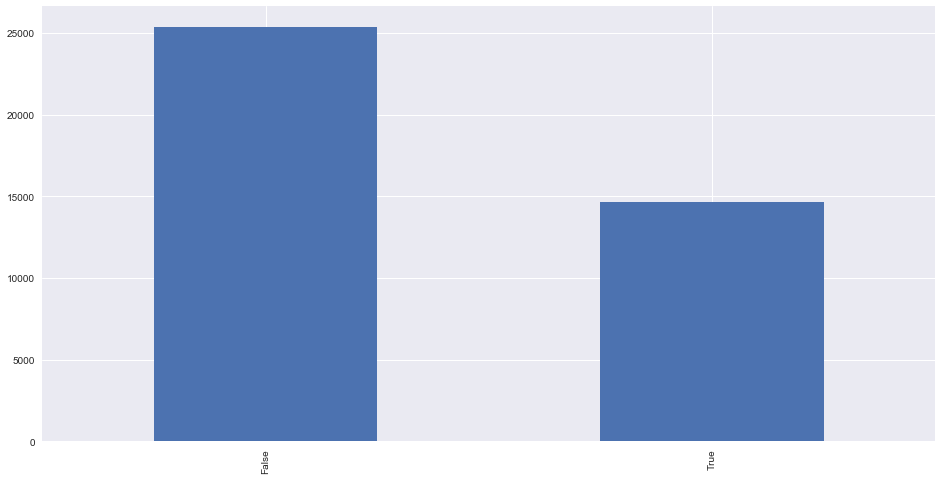

In [239]:
print df.active.value_counts()
df.active.value_counts().plot.bar()

In [240]:
import eda_tools as et

In [241]:
dtype_dict = {"bool_list" : list(df.select_dtypes(include=['bool']).columns), \
              "cat_vars" : list(df.select_dtypes(include=['O']).columns), \
              "cont_vars" : list(df.select_dtypes(include=['int', 'float']).columns), \
              "date_vars" : list(df.select_dtypes(include=['datetime']).columns)}

In [242]:
dtype_dict

{'bool_list': ['luxury_car_user', 'active'],
 'cat_vars': ['city', 'phone'],
 'cont_vars': ['avg_dist',
  'avg_rating_by_driver',
  'avg_rating_of_driver',
  'avg_surge',
  'surge_pct',
  'trips_in_first_30_days',
  'weekday_pct'],
 'date_vars': ['last_trip_date', 'signup_date']}

In [243]:
for col in dtype_dict["cat_vars"]:
    print df[col].value_counts()
    print "\n",  "*" * 50

Winterfell        18620
Astapor           13236
King's Landing     8144
Name: city, dtype: int64

**************************************************
iPhone     27628
Android    12053
Name: phone, dtype: int64

**************************************************


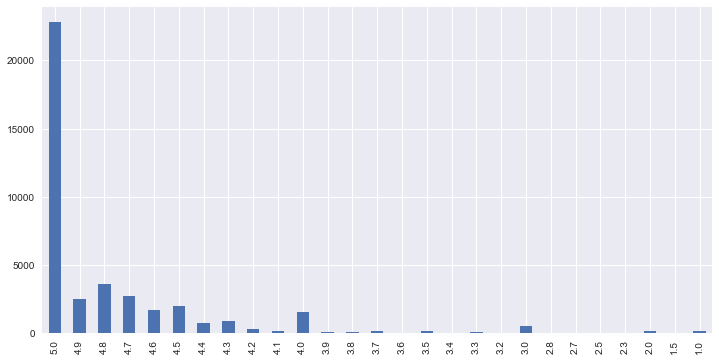

In [244]:
df["avg_rating_by_driver"].value_counts().sort_index(ascending=False).plot.bar(figsize=(12,6))

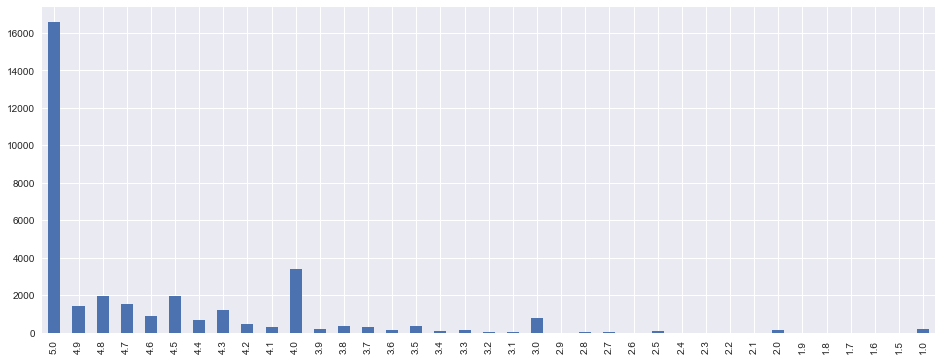

In [245]:
df["avg_rating_of_driver"].value_counts().sort_index(ascending=False).plot.bar(figsize=(16,6))

### 'avg_rating_by_driver': "the rider's average rating over all of their trips",  
### 'avg_rating_of_driver': "the rider's average rating of their drivers over all of their trips",

create difference feature?

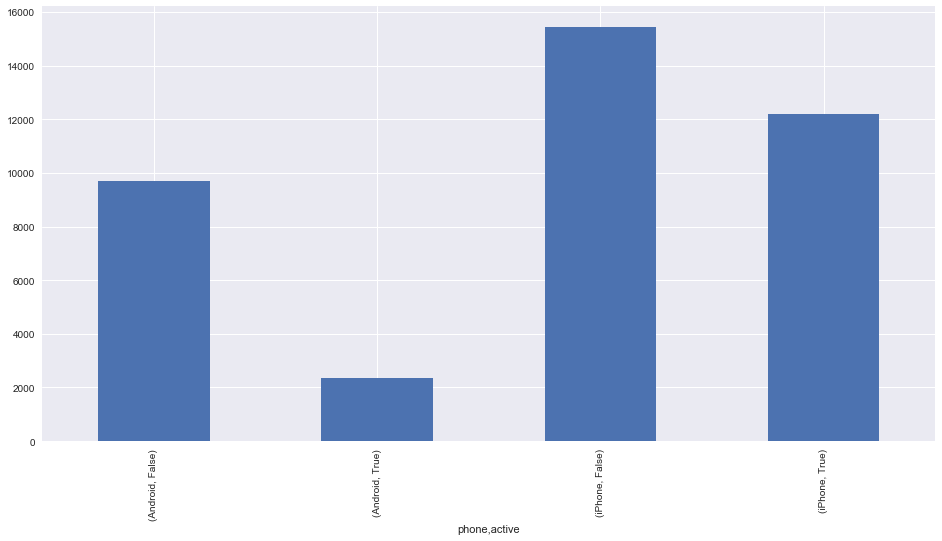

In [246]:
df.groupby(["phone", "active"]).count().iloc[:,0].plot.bar()

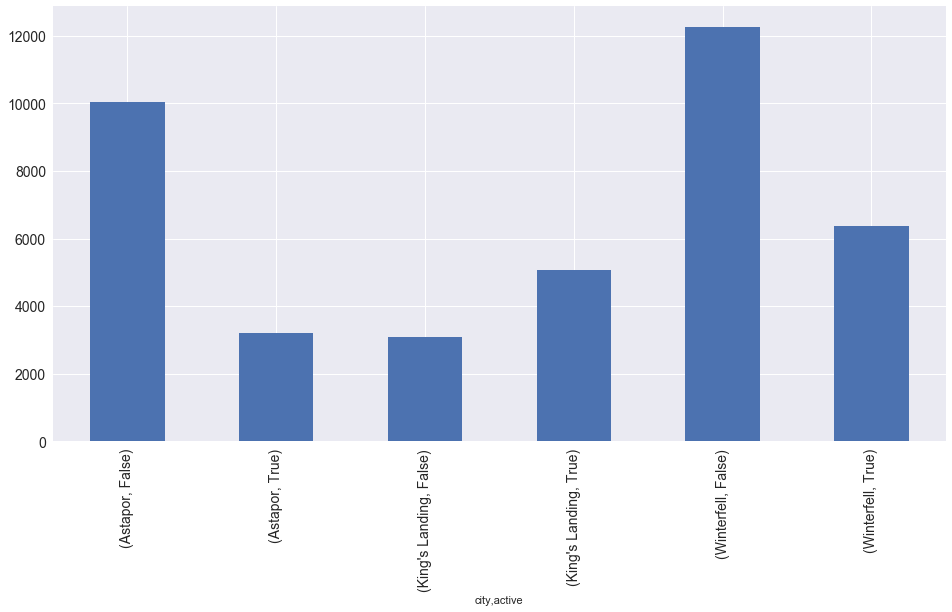

In [247]:
df.groupby(["city", "active"]).count().iloc[:,0].plot.bar(fontsize=14)

In [248]:
df.isnull().any()

avg_dist                  False
avg_rating_by_driver       True
avg_rating_of_driver       True
avg_surge                 False
city                      False
last_trip_date            False
phone                      True
signup_date               False
surge_pct                 False
trips_in_first_30_days    False
luxury_car_user           False
weekday_pct               False
active                    False
dtype: bool

In [249]:
def nan_counts(df, plot=False):
    from collections import OrderedDict
    # dict2 = OrderedDict({col: df[col].isnull().sum()/float(df.shape[0]) for col in df})
    dict1 = OrderedDict()
    for col in df:
        dict1[col]=df[col].isnull().sum()/float(df.shape[0])
    nan_count = pd.DataFrame(dict1, index=[0]).transpose()
    nan_count.columns = ["% NaNs of total"]
    if plot==True:
        nan_count.plot.bar(figsize=(18,10))
    return nan_count

In [176]:
nan_counts(df)

,% NaNs of total
avg_dist,0.0000
avg_rating_by_driver,0.0039
avg_rating_of_driver,0.1594
avg_surge,0.0000
city,0.0000
last_trip_date,0.0000
phone,0.0077
signup_date,0.0000
surge_pct,0.0000
trips_in_first_30_days,0.0000


In [250]:
df.shape

(40000, 13)

## Stage 2: Data Treatment (Missing values treatment):

There are various ways to deal with it. For our first model, we will focus on the smart and quick techniques to build your first effective model (These are already discussed by Tavish in his article, I am adding a few methods)

Create dummy flags for missing value(s) : It works, sometimes missing values itself carry a good amount of information.
Impute missing value with mean/ median/ any other easiest method : Mean and Median imputation performs well, mostly people prefer to impute with mean value but in case of skewed distribution I would suggest you to go with median. Other Intelligent methods are imputing values by similar case mean and median imputation using other relevant features or building a model. For Example: In Titanic survival challenge, you can impute missing values of Age using salutation of passengers name Like “Mr.”, “Miss.”,”Mrs.”,”Master” and others and this has shown good impact on model performance.
Impute missing value of categorical variable: Create a new level to impute categorical variable so that all missing value is coded as a single value say “New_Cat” or you can look at the frequency mix and impute the missing value with value having higher frequency.
With such simple methods of data treatment, you can reduce the time to treat data to 3-4 minutes.

 

### Step 5:  Create a new variable for each variable having missing value with VariableName_NA  and flag missing value with 1 and other with 0

for var in num_cat_cols:
    if fullData[var].isnull().any()==True:
        fullData[var+'_NA']=fullData[var].isnull()*1 

### Step 6: Impute Missing values
#Impute categorical missing values with -9999
fullData[cat_cols] = fullData[cat_cols].fillna(value = -9999)

In [251]:
df_before_impute = df.copy()

In [252]:
mean_rating = df["avg_rating_of_driver"].mean()
mean_rating

4.601696940726505

In [253]:
#Impute numerical missing values with mean
df["avg_rating_of_driver"].fillna(mean_rating, inplace=True)

In [254]:
df["avg_rating_of_driver"].unique()

array([ 5.        ,  4.60169694,  4.        ,  4.7       ,  3.        ,
        3.7       ,  4.5       ,  3.3       ,  3.6       ,  4.3       ,
        4.6       ,  3.8       ,  4.1       ,  1.        ,  4.4       ,
        4.9       ,  3.5       ,  4.8       ,  2.        ,  3.1       ,
        3.4       ,  4.2       ,  2.8       ,  2.7       ,  2.5       ,
        3.9       ,  2.6       ,  1.9       ,  2.3       ,  3.2       ,
        2.9       ,  2.1       ,  1.7       ,  1.5       ,  2.4       ,
        2.2       ,  1.8       ,  1.6       ])

In [255]:
#Impute numerical missing values with mean
df["avg_rating_by_driver"].fillna(df["avg_rating_by_driver"].mean(), inplace=True)

In [ ]:
df.dropna(axis=0)

In [256]:
df.shape

(40000, 13)

In [ ]:
df.dropna(axis=1)

In [229]:
nan_counts(df)

,% NaNs of total
avg_dist,0.0000
avg_rating_by_driver,0.0000
avg_rating_of_driver,0.0000
avg_surge,0.0000
city,0.0000
last_trip_date,0.0000
phone,0.0077
signup_date,0.0000
surge_pct,0.0000
trips_in_first_30_days,0.0000


### Step 7 : Create label encoders for categorical variables

#create label encoders for categorical features
for var in cat_cols:
 number = LabelEncoder()
 fullData[var] = number.fit_transform(fullData[var].astype('str'))

#Target variable is also a categorical so convert it
fullData["Account.Status"] = number.fit_transform(fullData["Account.Status"].astype('str'))

train=fullData[fullData['Type']=='Train']
test=fullData[fullData['Type']=='Test']

train['is_train'] = np.random.uniform(0, 1, len(train)) <= .75
Train, Validate = train[train['is_train']==True], train[train['is_train']==False]

## split the data set to train & test, further split the train data set to Train and Validate

Step 9 : Check performance and make predictions

status = rf.predict_proba(x_validate)
fpr, tpr, _ = roc_curve(y_validate, status[:,1])
roc_auc = auc(fpr, tpr)
print roc_auc

final_status = rf.predict_proba(x_test)
test["Account.Status"]=final_status[:,1]
test.to_csv('C:/Users/Analytics Vidhya/Desktop/model_output.csv',columns=['REF_NO','Account.Status'])

## Stage 3. Data Modelling Stage 3. Data Modelling :

I recommend to use any one of GBM / Random Forest techniques, depending on the business problem. These two techniques are extremely effective to create a benchmark solution. I have seen data scientist are using these two methods often as their first model and in some cases it acts as a final model also. This will take maximum amount of time (~4-5 minutes).

I recommend to use any one of GBM / Random Forest techniques, depending on the business problem. These two techniques are extremely effective to create a benchmark solution. I have seen data scientist are using these two methods often as their first model and in some cases it acts as a final model also. This will take maximum amount of time (~4-5 minutes).

### Step 8 : Pass the imputed and dummy (missing values flags) variables into the modelling process. I am using random forest to predict the class

features=list(set(list(fullData.columns))-set(ID_col)-set(target_col)-set(other_col))
x_train = Train[list(features)].values
y_train = Train["Account.Status"].values
x_validate = Validate[list(features)].values
y_validate = Validate["Account.Status"].values
x_test=test[list(features)].values
random.seed(100)
rf = RandomForestClassifier(n_estimators=1000)
rf.fit(x_train, y_train)

In [ ]:
# Import statements
"""
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
sklearn.LogisticRegression
sklearn.linear_model.SGDClassifier
sklearn.neighbors.KNeighborsClassifier
sklearn.ensemble.RandomForestClassifier
from sklearn.metrics import roc_curve, auc_score
sklearn.model_selection.cross_val_score
from sklearn.grid_search import GridSearchCV"""

In [ ]:
#GridSearch Example
"""from sklearn.ensemble import GradientBoostingClassifier
from sklearn.grid_search import GridSearchCV
param_grid = {'learning rate': [0.001, 0.01, 0.1]
             'max_depth': [4, 6],
             'min_samples_leaf': [4,8,16]
             'max_features': [0.75, 0.9, 1]}
model = GradientBoostingClassifier(n_estimators=3000)
gs_cv = GridSearchCV(model, param_grid).fit(X,y)

gs.cv_best_score, gs_cv.best_estimator_"""

## Stage 4. Estimation of Performance:

There are various methods to validate your model performance, I would suggest you to divide your train data set into Train and validate (ideally 70:30) and build model based on 70% of train data set. Now, cross-validate it using 30% of validate data set and evaluate the performance using evaluation metric. This finally takes 1-2 minutes to execute and document.

Intent of this article is not to win the competition, but to establish a benchmark for our self. Let’s look at the python codes to perform above steps and build your first model with higher impact.